In [78]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
%ls

datasets/  Energy-graph/  shared/  Untitled.ipynb


In [101]:
def watts2kwh(df: pd.DataFrame) -> int:
    df = df/1000 * 6/3600
    return df
# gets the number of the device from the filename
def getNumber(device : str) -> int:
    return int((device.split('.')[0]).split('_')[1])

# preproces the file by reading it, converting the timestamp to datetime and setting it as index
def preproces_file(file_path : str) -> pd.DataFrame:
    df = pd.read_csv(file_path, header=None, sep=" ")
    df[0] = pd.to_datetime(df[0], unit='s')
    df = df.set_index(0)
    df  = watts2kwh(df)
    
    return df


# calculates the loadprofiles for a given dataframe and returns them as a dictionary
def calculate_loadprofiles(df : pd.DataFrame) ->  dict:
    hourly  = df.resample('H').sum()
    daily = df.resample('D').sum()


    lp_daily = hourly.groupby(hourly.index.hour).mean()
    lp_weekly = daily.groupby(daily.index.dayofweek).mean()
    lp_monthly = daily.groupby(daily.index.day).mean()

    return {
        'daily' : lp_daily,
        'weekly' : lp_weekly,
        'monthly' : lp_monthly 
    }

# processes a house by reading all the files in the house folder and calculating the loadprofiles for each device and returning them as a dictionary
def process_house(house_path : str) -> dict:
    loadprofiles = {}
    lables = pd.read_csv(house_path+ "labels.dat", header=None, sep=" ")[1].values
    for device in tqdm(os.listdir(house_path)):
        if device.endswith(".dat"):
            if "channel" in device and "button" not in device:
                number = getNumber(device)
                name = lables[number-1]
                df = preproces_file(house_path + device)
                loadprofiles[name] = calculate_loadprofiles(df)

    return loadprofiles

    

In [79]:

loadprofiles = {}
lables = pd.read_csv("datasets/NILM/UK-DALE/house_1/labels.dat", header=None, sep=" ")[1].values
for device in tqdm(os.listdir("datasets/NILM/UK-DALE/house_1/")):
    if device.endswith(".dat"):
        if "channel" in device and "button" not in device:
            number = getNumber(device)
            name = lables[number-1]
            df = preproces_file("datasets/NILM/UK-DALE/house_1/" + device)
            loadprofiles[name] = calculate_loadprofiles(df)



  0%|          | 0/104 [00:00<?, ?it/s]

100%|██████████| 104/104 [01:47<00:00,  1.03s/it]


In [102]:
path = "datasets/NILM/UK-DALE"
loadprofiles = {}
for house in tqdm(os.listdir(path)):
    if "house" in house:
        loadprofiles[house] = process_house(path + "/" + house + "/")
    


100%|██████████| 7/7 [01:49<00:00, 15.57s/it]


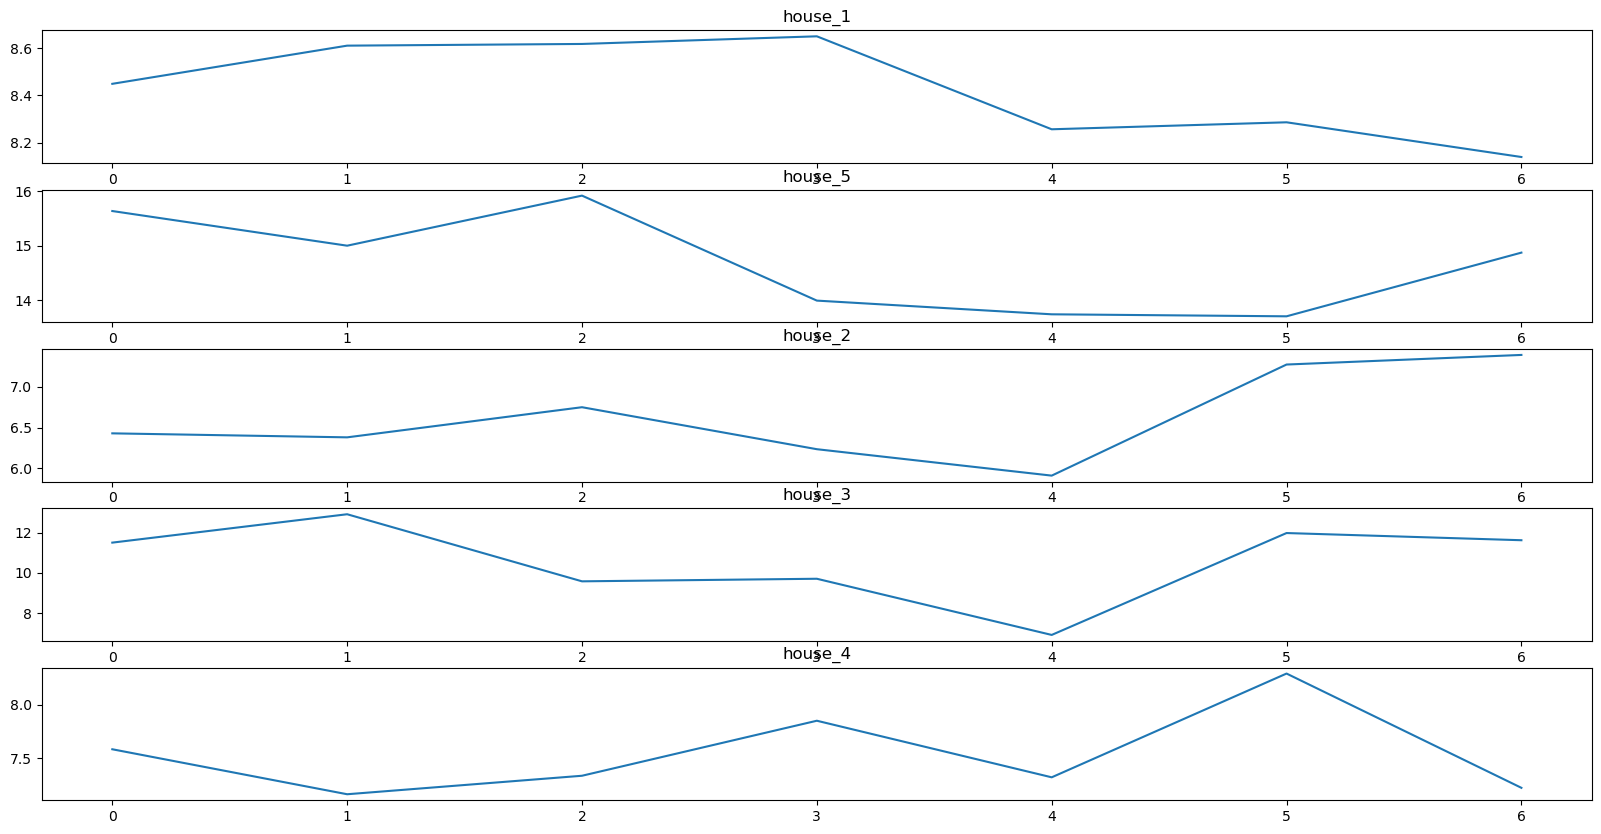

In [105]:
fig, ax  = plt.subplots(5,1, figsize=(20,10))
for i, house in enumerate(loadprofiles.keys()):
    ax[i].set_title(house)
    ax[i].plot(loadprofiles[house]['aggregate']['weekly'])


In [106]:

# save loadprofiles
import pickle
with open('./Energy-graph/data/UKDALE/ukdale_loadprofiles.pkl', 'wb') as handle:
    pickle.dump(loadprofiles, handle, protocol=pickle.HIGHEST_PROTOCOL)

    


In [58]:
df = preproces_file("datasets/NILM/UK-DALE/house_1/channel_1.dat")
df

,1
0,
2012-11-09 22:28:15,0.000998
2012-11-09 22:28:21,0.000970
2012-11-09 22:28:27,0.001000
2012-11-09 22:28:33,0.000977
2012-11-09 22:28:40,0.000993
...,...
2017-04-26 17:32:15,0.001112
2017-04-26 17:32:22,0.001112
2017-04-26 17:32:28,0.001143


,1
0,
2012-11-09 22:00:00,0.214453
2012-11-09 23:00:00,0.385920
2012-11-10 00:00:00,0.533370
2012-11-10 01:00:00,0.734122
2012-11-10 02:00:00,0.151193
...,...
2017-04-26 13:00:00,0.351870
2017-04-26 14:00:00,0.360452
2017-04-26 15:00:00,0.364002


In [11]:
mains = pd.read_csv("datasets/NILM/UK-DALE/house_1/mains.dat", sep=" ", header=None)

In [74]:
lables = pd.read_csv("datasets/NILM/UK-DALE/house_1/labels.dat", sep=" ", header=None)
devices = lables[1].values

In [76]:
devices

array(['aggregate', 'boiler', 'solar_thermal_pump', 'laptop',
       'washing_machine', 'dishwasher', 'tv', 'kitchen_lights', 'htpc',
       'kettle', 'toaster', 'fridge', 'microwave', 'lcd_office',
       'hifi_office', 'breadmaker', 'amp_livingroom', 'adsl_router',
       'livingroom_s_lamp', 'soldering_iron', 'gigE_&_USBhub', 'hoover',
       'kitchen_dt_lamp', 'bedroom_ds_lamp', 'lighting_circuit',
       'livingroom_s_lamp2', 'iPad_charger', 'subwoofer_livingroom',
       'livingroom_lamp_tv', 'DAB_radio_livingroom', 'kitchen_lamp2',
       'kitchen_phone&stereo', 'utilityrm_lamp', 'samsung_charger',
       'bedroom_d_lamp', 'coffee_machine', 'kitchen_radio',
       'bedroom_chargers', 'hair_dryer', 'straighteners', 'iron',
       'gas_oven', 'data_logger_pc', 'childs_table_lamp',
       'childs_ds_lamp', 'baby_monitor_tx', 'battery_charger',
       'office_lamp1', 'office_lamp2', 'office_lamp3', 'office_pc',
       'office_fan', 'LED_printer'], dtype=object)

In [20]:
channel_1 = pd.read_csv("datasets/NILM/UK-DALE/house_1/channel_1.dat", sep=" ", header=None)
# channel_7_button = pd.read_csv("datasets/NILM/UK-DALE/house_1/channel_7_button_press.dat", sep=" ", header=None)	

In [44]:
channel_1.head()

# unix time to datetime


,0,1
0,2012-11-09 22:28:15,599
1,2012-11-09 22:28:21,582
2,2012-11-09 22:28:27,600
3,2012-11-09 22:28:33,586
4,2012-11-09 22:28:40,596


In [27]:
channel_1[0] = pd.to_datetime(channel_1[0], unit='s') 

In [30]:
channel_1.head(1000000000000000000000)

hourly = channel_1.resample('H', on=0).sum()

In [46]:
watts2kwh(hourly)

,1
0,
2012-11-09 22:00:00,0.214453
2012-11-09 23:00:00,0.385920
2012-11-10 00:00:00,0.533370
2012-11-10 01:00:00,0.734122
2012-11-10 02:00:00,0.151193
...,...
2017-04-26 13:00:00,0.351870
2017-04-26 14:00:00,0.360452
2017-04-26 15:00:00,0.364002


In [75]:
lables[1].values[0]

'aggregate'